In [1]:
from main import api

In [2]:
params, mappings = api.get_from_data_parameters('./data/vaccines.json')

In [3]:
model = api.obtain_model(params)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-05-31
Using license file D:\Users\gabri\gurobi.lic


In [4]:
model.read("out.mst")

Read MIP start from file out.mst


In [5]:
model.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 6 logical processors, using up to 6 threads
Optimize a model with 18710 rows, 13600 columns and 96850 nonzeros
Model fingerprint: 0x2fdf2a52
Variable types: 1000 continuous, 12600 integer (6300 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+12]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

User MIP start did not produce a new incumbent solution

Presolve removed 12840 rows and 5535 columns
Presolve time: 0.20s
Presolved: 5870 rows, 8065 columns, 36286 nonzeros
Variable types: 838 continuous, 7227 integer (6234 binary)

Root relaxation: objective 2.400000e+05, 4833 iterations, 0.30 seconds
Another try with MIP start

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | 

In [6]:
import pandas as pd

In [7]:
from vacunacion_regional.data_management.postprocessing import process_model_variables, get_mapped_variables

In [8]:
mapped_variables = get_mapped_variables(model)
variables = process_model_variables(mapped_variables)

In [9]:
data = pd.json_normalize(variables['porcentajes_comuna_dia'])
data['comuna'] = data['comuna'].map(mappings['comunas'])

In [10]:
from vacunacion_regional.data_management.postprocessing import get_porcentajes_vacunacion_plot, get_porcentajes_vacunacion_target_plot

In [11]:
import matplotlib.pyplot as plt

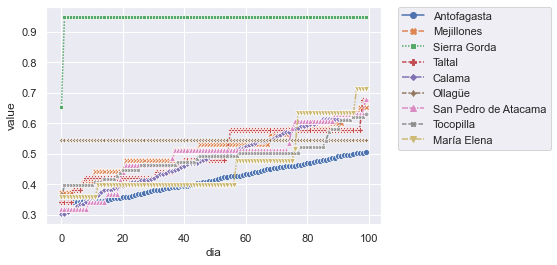

In [12]:
plot = get_porcentajes_vacunacion_plot(variables, mappings)
plt.savefig("by_comuna.png")

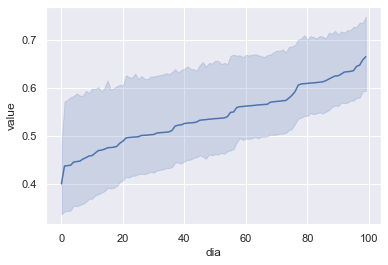

In [13]:
plot2 = get_porcentajes_vacunacion_target_plot(variables, mappings)
plt.savefig("median_with_var.png")